# **Google Data Analytics Capstone Project**

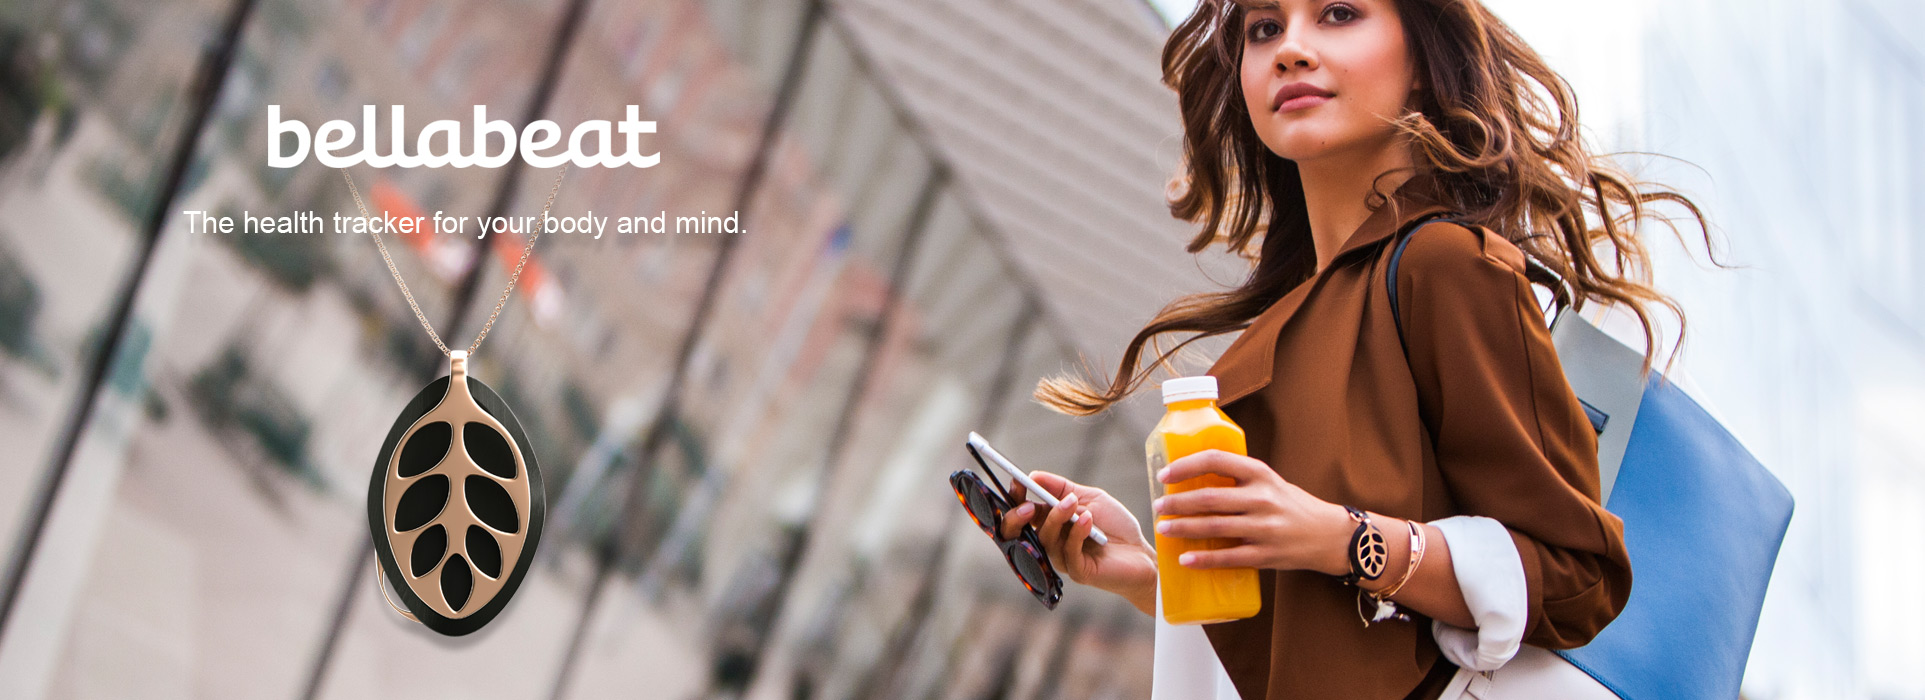

**Introduction**

Bellabeat is a company that designs smart health and wellness products aimed primarily at women. Founded in 2013 by Urška Sršen and Sandro Mur, Bellabeat focuses on creating technology that helps women track and improve their health and lifestyle. Their product line includes:

1. **Leaf**: A smart jewelry piece that can be worn as a necklace, bracelet, or clip. It tracks activity, sleep, stress, and reproductive health.
2. **Time**: A hybrid wellness watch that monitors activity, sleep, stress, and menstrual cycles, and offers breathing exercises.
3. **Spring**: A smart water bottle that tracks water intake and helps users stay hydrated.
4. **Ivy**: A smart bracelet designed to monitor and enhance women’s wellness through tracking various health metrics and providing personalized insights.
5. **Bellabeat App**: An application that syncs with their devices to provide detailed health and wellness insights, personalized recommendations, and tracking for activity, sleep, stress, menstrual cycle, and more.

Bellabeat emphasizes holistic health, aiming to integrate physical activity, mental well-being, and reproductive health into a comprehensive wellness approach tailored for women.

# **Step 1 : ASK**

**Buisness task** 

Need to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.

**Key Stakeholders** 

**Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer.

**Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.

**Bellabeat marketing analytics team:** A team of data analysts responsible forcollecting,analyzing,and reporting data that                                         helps guide Bellabeat’s marketing strategy.


# **Step 2 : PREPARE**

**Data Source**

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): 

This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**Data Organisation**

Downloaded zip file contains two folders Fitbit data from 3/12/2016 to 4/12/2016 and 4/12/2016 to 5/12/2016. Iam considering only the folder with most recent available data (4/12/2016 to 5/12/2016) for analyses which contains 18 .csv files which includes the activity, calories, intensities, and steps, categorized into daily, hourly, and minute intervals. It also includes data on heart rate, metabolic equivalents (METs), sleep duration, and weight.

Data is organised in a long format with each unique id is having multiple rows categrised based on the ActoivityDate.

Issues/Bias :- 
1. Latest Data is not available, the data collected in the year 2016.
2. Population size is small (Only 33 users) so can effect the accuracy of analyses.
3. Inconstistent number of user records, for example weight gas only 8 entries and sleep has 20 which makes difficult for    accurate result analyses.

**Licensing**

CC0: Public Domain

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

# **Step 3 : PROCESS**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading .csv files**

In [2]:
daily_activity = pd.read_csv('/kaggle/input/fitbit/dailyActivity_merged.csv')
daily_calories = pd.read_csv('/kaggle/input/fitbit/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('/kaggle/input/fitbit/dailyIntensities_merged.csv')
daily_steps = pd.read_csv('/kaggle/input/fitbit/dailySteps_merged.csv')
daily_sleep = pd.read_csv('/kaggle/input/fitbit/sleepDay_merged.csv')
heartrate_seconds = pd.read_csv('/kaggle/input/fitbit/heartrate_seconds_merged.csv')
weightlog_info = pd.read_csv('/kaggle/input/fitbit/weightLogInfo_merged.csv')

In [3]:
# Display the first few rows of each dataframe
print("Daily Activity Data")
print(daily_activity.head())

print("\nDaily Calories Data")
print(daily_calories.head())

print("\nDaily Intensities Data")
print(daily_intensities.head())

print("\nDaily Steps Data")
print(daily_steps.head())

print("\nDaily Sleep Data")
print(daily_sleep.head())

print("\nHeartrate Seconds Data")
print(heartrate_seconds.head())

print("\nWeightlog Info Data")
print(weightlog_info.head())


Daily Activity Data
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0 

**Clean**

From the above it is clear that need to convert datetime format for all files to make it similar for further analyses.

In [4]:
# Convert date columns to datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'], format='%m/%d/%Y')
daily_intensities['ActivityDay'] = pd.to_datetime(daily_intensities['ActivityDay'], format='%m/%d/%Y')
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'], format='%m/%d/%Y')
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
weightlog_info['Date'] = pd.to_datetime(weightlog_info['Date'], format='%m/%d/%Y %I:%M:%S %p')
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'], format='%m/%d/%Y %I:%M:%S %p')


Checking the null values

In [5]:
# Check for missing values
print("\nMissing values in Daily Activity Data")
print(daily_activity.isnull().sum())

print("\nMissing values in Daily Calories Data")
print(daily_calories.isnull().sum())

print("\nMissing values in Daily Intensities Data")
print(daily_intensities.isnull().sum())

print("\nMissing values in Daily Steps Data")
print(daily_steps.isnull().sum())

print("\nMissing values in Daily Sleep Data")
print(daily_sleep.isnull().sum())

print("\nMissing values in Heartrate Seconds Data")
print(heartrate_seconds.isnull().sum())

print("\nMissing values in Weightlog Info Data")
print(weightlog_info.isnull().sum())


Missing values in Daily Activity Data
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Missing values in Daily Calories Data
Id             0
ActivityDay    0
Calories       0
dtype: int64

Missing values in Daily Intensities Data
Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

Missing values in Daily Steps Data
Id  

The missing values in the Fat column of the weightlog_info dataset need to be handled before we proceed with further analysis.we will fill the missing values in the Fat column with the mean value of that column.

In [6]:
# Fill missing values in the 'Fat' column with the mean value of the column
weightlog_info['Fat'] = weightlog_info['Fat'].fillna(weightlog_info['Fat'].mean())

# Verify that there are no missing values
print("\nMissing values in Weightlog Info Data after filling missing values")
print(weightlog_info.isnull().sum())



Missing values in Weightlog Info Data after filling missing values
Id                0
Date              0
WeightKg          0
WeightPounds      0
Fat               0
BMI               0
IsManualReport    0
LogId             0
dtype: int64


To check for the number of unique users and any duplicate entries in the datasets

In [7]:
# Count distinct Ids in each dataset
unique_users_daily_activity = daily_activity['Id'].nunique()
unique_users_daily_calories = daily_calories['Id'].nunique()
unique_users_daily_intensities = daily_intensities['Id'].nunique()
unique_users_daily_steps = daily_steps['Id'].nunique()
unique_users_daily_sleep = daily_sleep['Id'].nunique()
unique_users_heartrate_seconds = heartrate_seconds['Id'].nunique()
unique_users_weightlog_info = weightlog_info['Id'].nunique()

print(f"Unique users in daily_activity: {unique_users_daily_activity}")
print(f"Unique users in daily_calories: {unique_users_daily_calories}")
print(f"Unique users in daily_intensities: {unique_users_daily_intensities}")
print(f"Unique users in daily_steps: {unique_users_daily_steps}")
print(f"Unique users in daily_sleep: {unique_users_daily_sleep}")
print(f"Unique users in heartrate_seconds: {unique_users_heartrate_seconds}")
print(f"Unique users in weightlog_info: {unique_users_weightlog_info}")

# Check for duplicate entries
duplicates_daily_activity = daily_activity.duplicated(subset=['Id', 'ActivityDate']).sum()
duplicates_daily_calories = daily_calories.duplicated(subset=['Id', 'ActivityDay']).sum()
duplicates_daily_intensities = daily_intensities.duplicated(subset=['Id', 'ActivityDay']).sum()
duplicates_daily_steps = daily_steps.duplicated(subset=['Id', 'ActivityDay']).sum()
duplicates_daily_sleep = daily_sleep.duplicated(subset=['Id', 'SleepDay']).sum()
duplicates_heartrate_seconds = heartrate_seconds.duplicated(subset=['Id', 'Time']).sum()
duplicates_weightlog_info = weightlog_info.duplicated(subset=['Id', 'Date']).sum()

print(f"Duplicate entries in daily_activity: {duplicates_daily_activity}")
print(f"Duplicate entries in daily_calories: {duplicates_daily_calories}")
print(f"Duplicate entries in daily_intensities: {duplicates_daily_intensities}")
print(f"Duplicate entries in daily_steps: {duplicates_daily_steps}")
print(f"Duplicate entries in daily_sleep: {duplicates_daily_sleep}")
print(f"Duplicate entries in heartrate_seconds: {duplicates_heartrate_seconds}")
print(f"Duplicate entries in weightlog_info: {duplicates_weightlog_info}")

Unique users in daily_activity: 33
Unique users in daily_calories: 33
Unique users in daily_intensities: 33
Unique users in daily_steps: 33
Unique users in daily_sleep: 24
Unique users in heartrate_seconds: 14
Unique users in weightlog_info: 8
Duplicate entries in daily_activity: 0
Duplicate entries in daily_calories: 0
Duplicate entries in daily_intensities: 0
Duplicate entries in daily_steps: 0
Duplicate entries in daily_sleep: 3
Duplicate entries in heartrate_seconds: 0
Duplicate entries in weightlog_info: 0


Remove duplicates of daily sleep

In [8]:
# Remove duplicates based on Id and SleepDay columns
daily_sleep.drop_duplicates(subset=['Id', 'SleepDay'], inplace=True)

# Check the number of duplicates after removing
print(f"Number of duplicates after removing: {daily_sleep.duplicated(subset=['Id', 'SleepDay']).sum()}")

Number of duplicates after removing: 0


In [9]:
# Add column for day of the week
daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.day_name()
daily_sleep['DayOfWeek'] = daily_sleep['SleepDay'].dt.day_name()

# Add column for total active minutes in daily_activity
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']

# Display the updated datasets
print(daily_activity.head())
print(daily_sleep.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

Merge the datasets for analyses

In [10]:
# Display columns to verify names
print("Columns of daily_activity:")
print(daily_activity.columns)
print("\nColumns of daily_sleep:")
print(daily_sleep.columns)
# Merge daily_activity and daily_sleep on 'Id', 'ActivityDate', and 'DayOfWeek'
merged_ActivitySleep = pd.merge(daily_activity, daily_sleep, on=['Id', 'DayOfWeek'], how='inner')

# Display the merged dataset
print(merged_ActivitySleep.head())

Columns of daily_activity:
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'TotalActiveMinutes'],
      dtype='object')

Columns of daily_sleep:
Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'DayOfWeek'],
      dtype='object')
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162            8.5              8.5   
1  1503960366   2016-04-12       13162            8.5              8.5   
2  1503960366   2016-04-12       13162            8.5              8.5   
3  1503960366   2016-04-12       13162            8.5              8.5   
4  1503960366   2016-04-12       13162           

In [11]:
weightlog_info.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

In [12]:
# Merge with daily_intensities on 'Id' and 'ActivityDay'
merged_data = pd.merge(merged_ActivitySleep, daily_intensities, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='left')

# Merge with daily_calories on 'Id' and 'ActivityDay'
merged_data = pd.merge(merged_data, daily_calories, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='left')

# Display the final merged dataset
print("\nFinal merged dataset:")
print(merged_data.head())


Final merged dataset:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162            8.5              8.5   
1  1503960366   2016-04-12       13162            8.5              8.5   
2  1503960366   2016-04-12       13162            8.5              8.5   
3  1503960366   2016-04-12       13162            8.5              8.5   
4  1503960366   2016-04-12       13162            8.5              8.5   

   LoggedActivitiesDistance  VeryActiveDistance_x  ModeratelyActiveDistance_x  \
0                       0.0                  1.88                        0.55   
1                       0.0                  1.88                        0.55   
2                       0.0                  1.88                        0.55   
3                       0.0                  1.88                        0.55   
4                       0.0                  1.88                        0.55   

   LightActiveDistance_x  SedentaryActiveDist

The weight info dataset has only 8 values which is very less to make any observations or predictions

# **Step 4: ANALYSE**

**Correlation Analysis:**

Analyze the correlation between different variables such as activity levels, sleep, and weight.


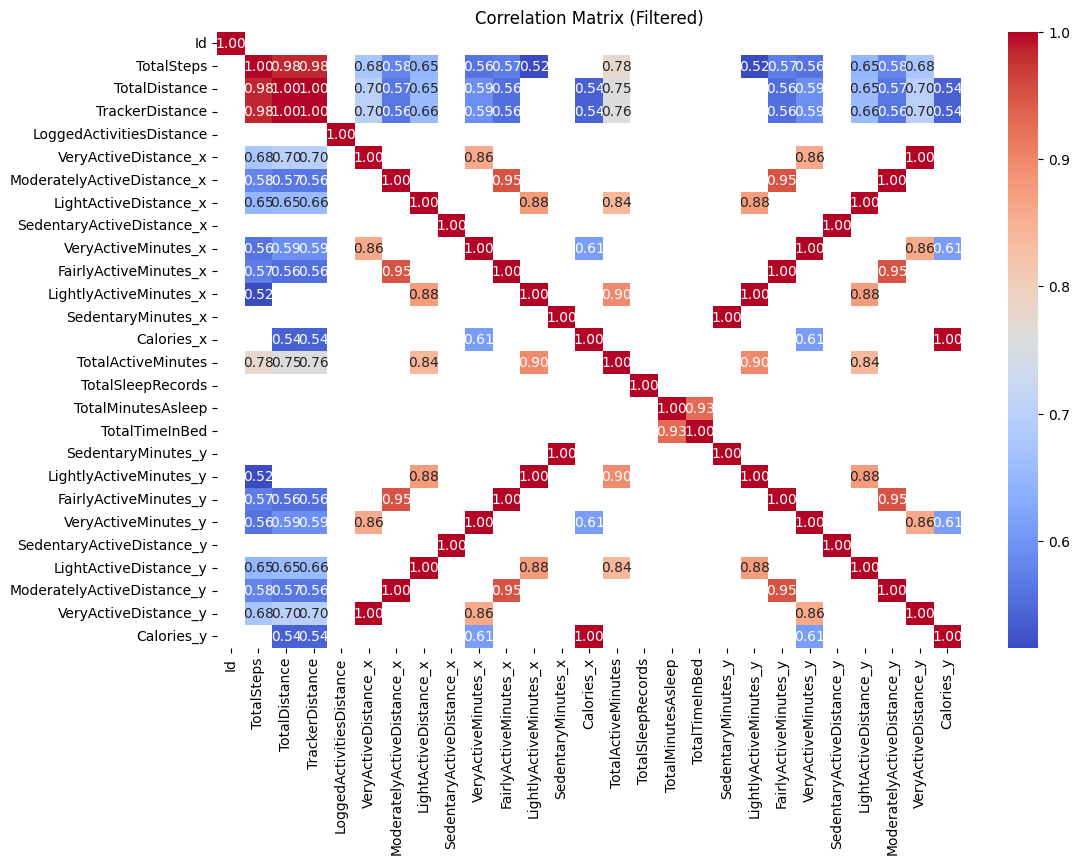

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Filter the correlation matrix to show only high correlations
threshold = 0.5
high_correlation_matrix = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=high_correlation_matrix.isnull())
plt.title('Correlation Matrix (Filtered)')
plt.show()

The filtered correlation matrix heatmap displays the correlation coefficients between different numerical variables in the merged dataset. Here are some insights we can derive from the heatmap:

1. **High Correlation Between Activity Measures**:
   - `TotalSteps`, `TotalDistance`, and `Calories_x` are highly correlated with each other, indicating that people who take more steps tend to cover more distance and burn more calories.
   - `VeryActiveMinutes_x` shows a high correlation with `VeryActiveDistance_x`, suggesting that longer periods of very active minutes are associated with longer very active distances.

2. **Sleep Measures**:
   - `TotalMinutesAsleep` and `TotalTimeInBed` have a very high correlation (0.93), which makes sense because the total time in bed includes the total minutes asleep.
   - `TotalMinutesAsleep` is positively correlated with `TotalActiveMinutes`, indicating that more active individuals also tend to sleep more. However, this correlation is not very strong.

3. **Sedentary Measures**:
   - `SedentaryMinutes_x` has a negative correlation with most active measures such as `VeryActiveMinutes_x` and `ModeratelyActiveDistance_x`. This suggests that more sedentary time is inversely related to active time and distance.

4. **Caloric Expenditure**:
   - `Calories_y` is positively correlated with `VeryActiveMinutes_y`, `FairlyActiveMinutes_y`, and `ModeratelyActiveDistance_y`, indicating that higher levels of activity lead to more calories burned.

### Specific Observations:
- `TotalSteps` and `TotalDistance` have a near-perfect correlation (0.98), suggesting that the number of steps taken is a very strong indicator of the distance covered.
- `LoggedActivitiesDistance` has a strong correlation with `VeryActiveDistance_x` (0.70), indicating that logged activities are often very active.
- `FairlyActiveMinutes_x` and `FairlyActiveMinutes_y` have a very high correlation (0.95), suggesting consistency in these measurements across different datasets.

**Activity and Calories Analysis**

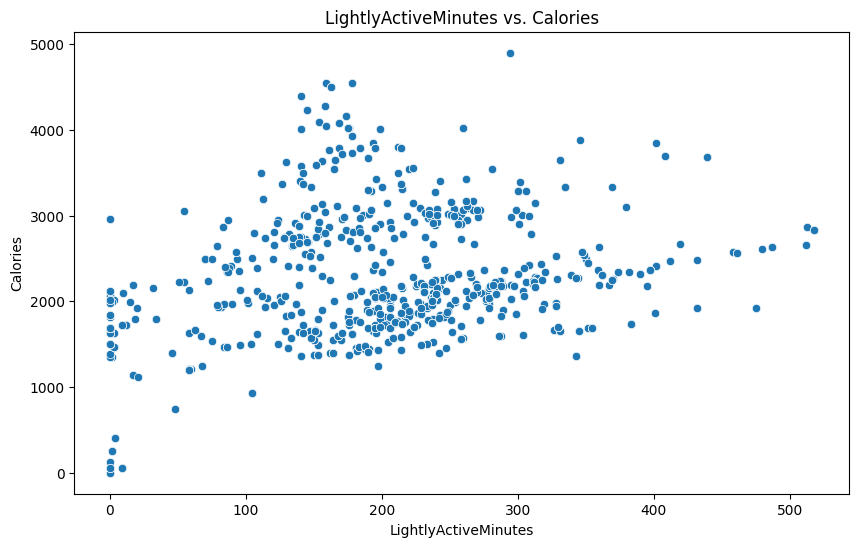

In [14]:
# Scatter plot of LightlyActiveMinutes vs. Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LightlyActiveMinutes_x', y='Calories_x', data=merged_data)
plt.title('LightlyActiveMinutes vs. Calories')
plt.xlabel('LightlyActiveMinutes')
plt.ylabel('Calories')
plt.show()

**LightlyActiveMinutes vs. Calories:**

**General Trend:** There is a positive correlation between LightlyActiveMinutes and Calories burned. As LightlyActiveMinutes increase, the number of Calories burned tends to increase as well.

**Data Distribution:** Most data points cluster between 0 to 200 LightlyActiveMinutes with Calories ranging between 1500 to 3500. There are a few outliers with higher activity minutes but the calorie burn remains consistent with the general trend.

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance_x',
       'ModeratelyActiveDistance_x', 'LightActiveDistance_x',
       'SedentaryActiveDistance_x', 'VeryActiveMinutes_x',
       'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'SedentaryMinutes_x',
       'Calories_x', 'DayOfWeek', 'TotalActiveMinutes', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'ActivityDay_x', 'SedentaryMinutes_y', 'LightlyActiveMinutes_y',
       'FairlyActiveMinutes_y', 'VeryActiveMinutes_y',
       'SedentaryActiveDistance_y', 'LightActiveDistance_y',
       'ModeratelyActiveDistance_y', 'VeryActiveDistance_y', 'ActivityDay_y',
       'Calories_y'],
      dtype='object')
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162            8.5              8.5   
1  1503960366   2016-04-12       13162            8.5              

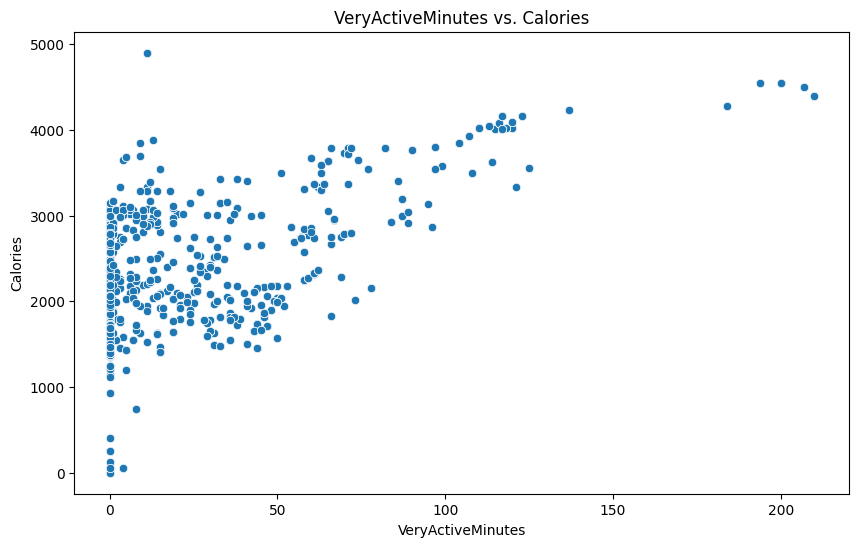

In [15]:
# Display the column names to check for the correct names
print(merged_data.columns)

# Display a few rows to understand the structure
print(merged_data.head())

# For the sake of this example, let's assume the correct columns are 'VeryActiveMinutes_x' and 'Calories_x'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VeryActiveMinutes_x', y='Calories_x', data=merged_data)
plt.title('VeryActiveMinutes vs. Calories')
plt.xlabel('VeryActiveMinutes')
plt.ylabel('Calories')
plt.show()


**VeryActiveMinutes vs. Calories:**

**General Trend:** A stronger positive correlation is observed between VeryActiveMinutes and Calories burned compared to LightlyActiveMinutes. As VeryActiveMinutes increase, the number of Calories burned increases significantly.

**Data Distribution:** The data is more spread out with a significant number of data points clustering at the lower end (0 to 50 VeryActiveMinutes). There is a noticeable increase in Calories burned with more VeryActiveMinutes, indicating higher calorie burn with increased high-intensity activities.

**Sleep and Activity Analysis**

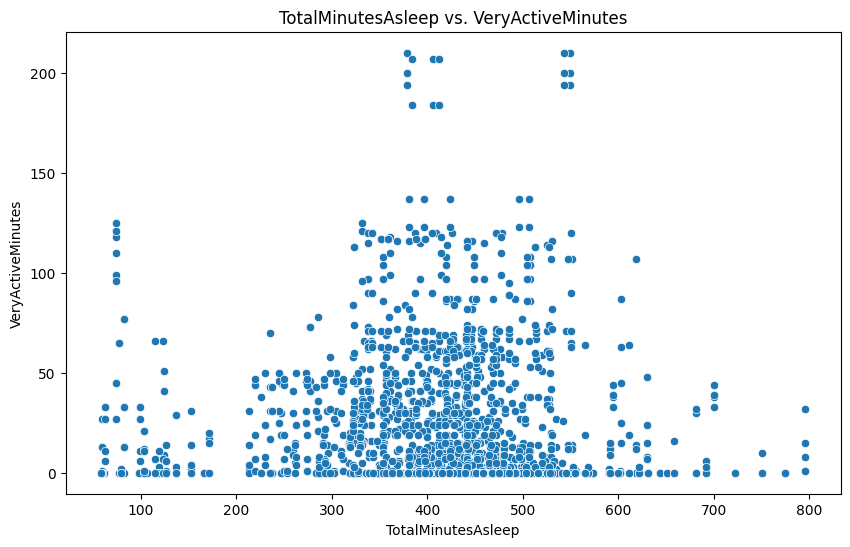

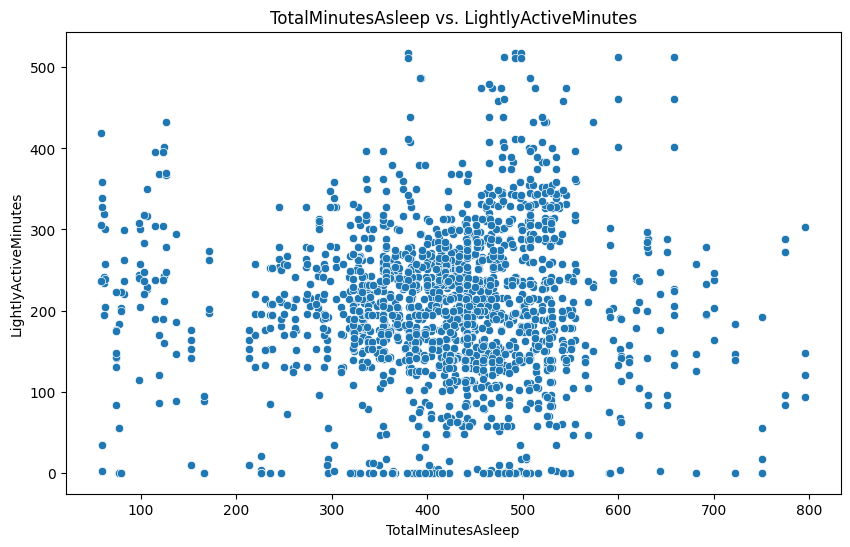

In [16]:
# Scatter plot of TotalMinutesAsleep vs. VeryActiveMinutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalMinutesAsleep', y='VeryActiveMinutes_x', data=merged_data)
plt.title('TotalMinutesAsleep vs. VeryActiveMinutes')
plt.xlabel('TotalMinutesAsleep')
plt.ylabel('VeryActiveMinutes')
plt.show()

# Scatter plot of TotalMinutesAsleep vs. LightlyActiveMinutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalMinutesAsleep', y='LightlyActiveMinutes_x', data=merged_data)
plt.title('TotalMinutesAsleep vs. LightlyActiveMinutes')
plt.xlabel('TotalMinutesAsleep')
plt.ylabel('LightlyActiveMinutes')
plt.show()


The overall relationship between TotalMinutesAsleep and VeryActiveMinutes does not indicate a clear linear correlation, suggesting that sleep duration does not strongly affect very active minutes in a simple linear manner.

The plot suggests that there may be a mild positive trend: as TotalMinutesAsleep increases, LightlyActiveMinutes also show a slight increase, but this is not a strong correlation.

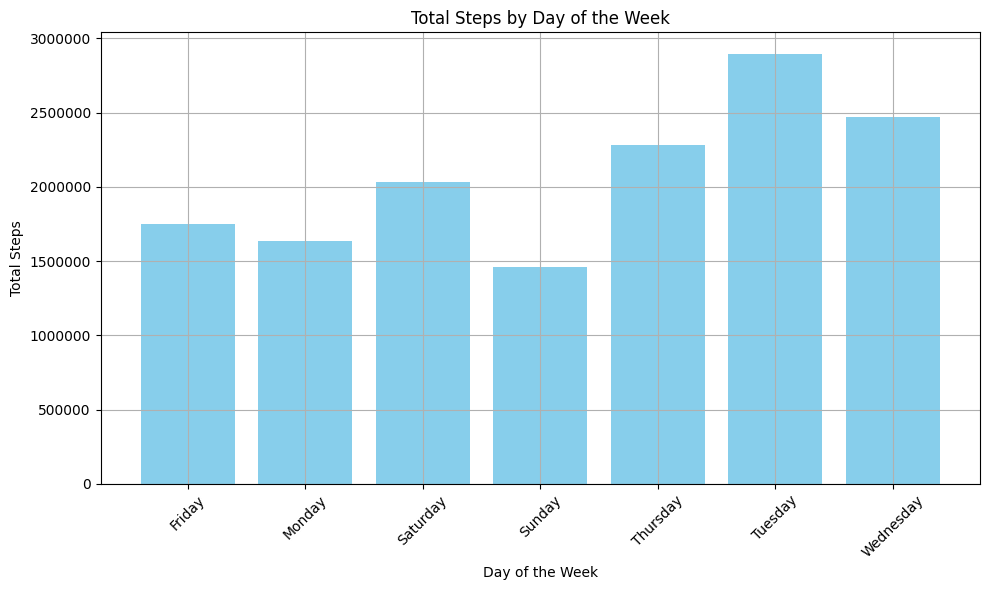

In [17]:
# Convert 'TotalSteps' to numeric if it's not already
merged_data['TotalSteps'] = pd.to_numeric(merged_data['TotalSteps'], errors='coerce')

# Group by 'DayOfWeek' and calculate total steps for each day
steps_by_day = merged_data.groupby('DayOfWeek')['TotalSteps'].sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(steps_by_day.index, steps_by_day.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.title('Total Steps by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.ticklabel_format(style='plain', axis='y')  # Ensure y-axis labels are not in scientific notation
plt.grid(True)
plt.tight_layout()
plt.show()


Mid-Week Peak: The highest activity levels during Tuesday, Wednesday, and Thursday suggest a pattern of increased physical activity during the mid-week.

Weekend Activity: Saturday shows a higher level of activity, possibly due to more leisure time and engagement in outdoor or fitness activities.

Rest on Sunday: The low activity on Sunday may indicate a common rest day.

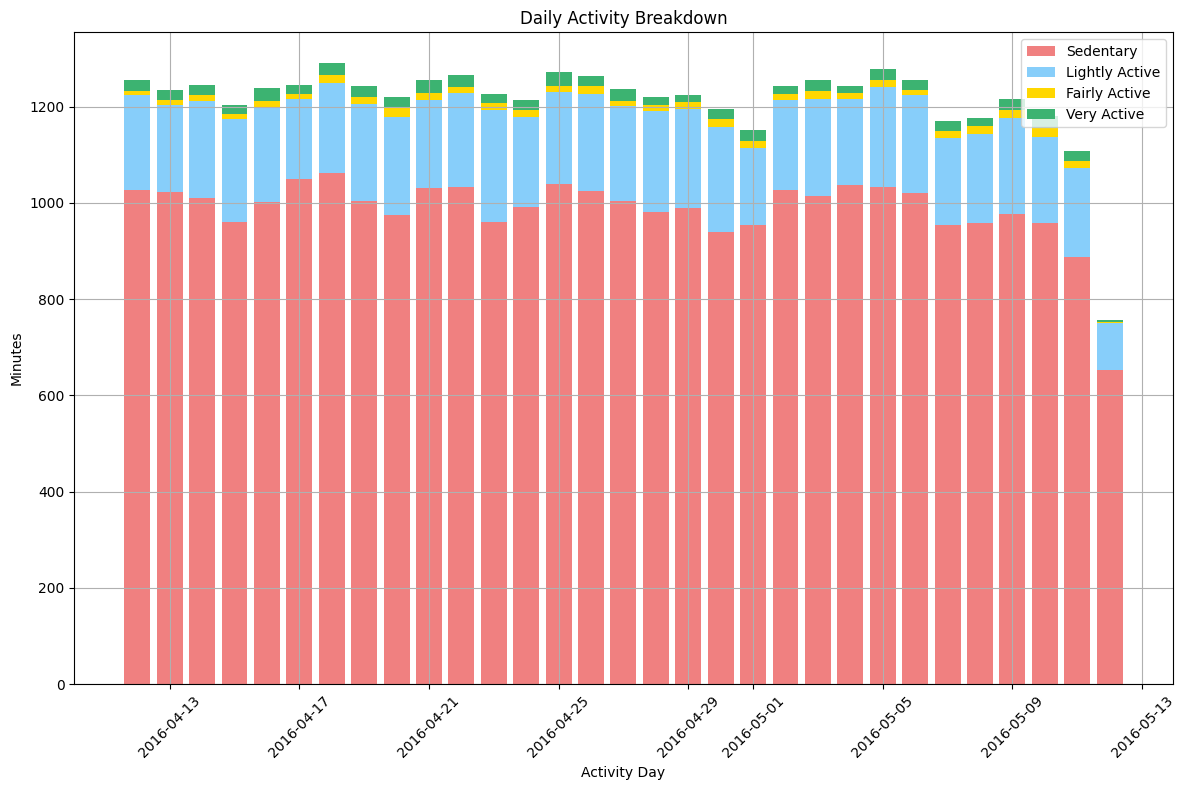

In [18]:
mean_activity = daily_intensities.groupby('ActivityDay').mean()

# Plotting the activity metrics as a stacked bar chart
plt.figure(figsize=(12, 8))

# Plotting each activity metric as a stacked bar
plt.bar(mean_activity.index, mean_activity['SedentaryMinutes'], label='Sedentary', color='lightcoral')
plt.bar(mean_activity.index, mean_activity['LightlyActiveMinutes'], bottom=mean_activity['SedentaryMinutes'], label='Lightly Active', color='lightskyblue')
plt.bar(mean_activity.index, mean_activity['FairlyActiveMinutes'], bottom=mean_activity['SedentaryMinutes'] + mean_activity['LightlyActiveMinutes'], label='Fairly Active', color='gold')
plt.bar(mean_activity.index, mean_activity['VeryActiveMinutes'], bottom=mean_activity['SedentaryMinutes'] + mean_activity['LightlyActiveMinutes'] + mean_activity['FairlyActiveMinutes'], label='Very Active', color='mediumseagreen')

# Customizing plot
plt.xlabel('Activity Day')
plt.ylabel('Minutes')
plt.title('Daily Activity Breakdown')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

**Sedentary (Red):** This is the predominant activity level throughout the period, occupying the majority of each day's minutes.

**Lightly Active (Blue):** This level shows significant variation, contributing a substantial portion of the activity on most days.

**Fairly Active (Yellow) and Very Active (Green):** These levels constitute a smaller proportion of the daily activities, with some days having more activity in these categories than others.

The overall trend indicates that most days have a high percentage of sedentary activity, with varying levels of light, moderate, and very active minutes.

# **Step 4: SHARE**

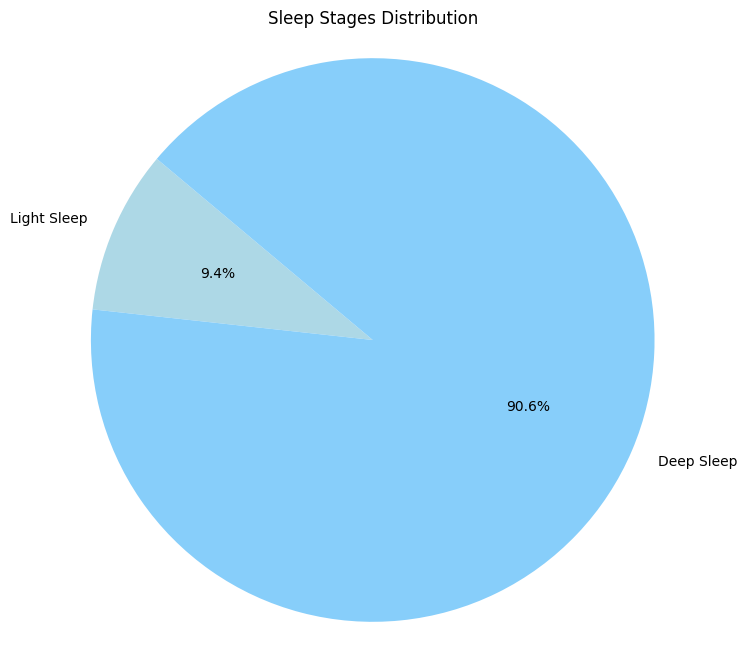

In [19]:
daily_sleep['LightSleepMinutes'] = daily_sleep['TotalTimeInBed'] - daily_sleep['TotalMinutesAsleep']
daily_sleep['DeepSleepMinutes'] = daily_sleep['TotalMinutesAsleep'] - daily_sleep['LightSleepMinutes']

# Example data for sleep stages (replace with your actual calculated values)
sleep_stages = ['Light Sleep', 'Deep Sleep']
sleep_duration = [daily_sleep['LightSleepMinutes'].sum(), daily_sleep['DeepSleepMinutes'].sum()]

# Colors for each sleep stage
colors = ['lightblue', 'lightskyblue']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sleep_duration, labels=sleep_stages, colors=colors, autopct='%1.1f%%', startangle=140)

# Customizing plot
plt.title('Sleep Stages Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


The high percentage of Deep Sleep (90.6%) suggests that Bellabeat users are experiencing substantial periods of restorative sleep, which is crucial for physical and mental recovery.

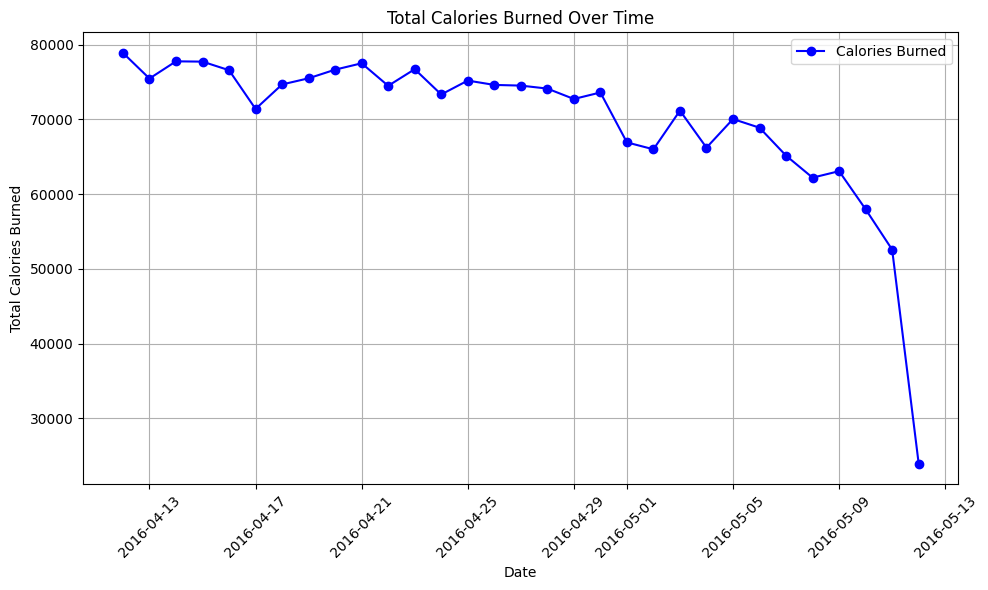

In [20]:
# Convert ActivityDay to datetime format
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])

# Group by day and calculate total calories burned per day
dailycalories = daily_calories.groupby(daily_calories['ActivityDay'])['Calories'].sum()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(dailycalories.index, dailycalories.values, marker='o', linestyle='-', color='b', label='Calories Burned')

# Customizing the plot
plt.title('Total Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Total Calories Burned')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Peak on 2016-04-13:** Indicates a day of significantly higher physical activity, potentially due to events, intense workouts, or increased daily activity.

**Gradual Decline towards 2016-05-13:** Suggests a decreasing trend in calories burned over time, possibly reflecting seasonal changes, behavioral shifts, or varying weather conditions affecting outdoor activities.

**Insights for Bellabeat:** Understanding these trends helps Bellabeat tailor recommendations and features to encourage consistent physical activity throughout different seasons and daily routines.
Provides opportunities to support users with personalized insights and goal-setting strategies to maintain long-term health and fitness goals.

**Activity Patterns:** Users exhibit varied activity levels throughout the week, with the highest activity on Tuesdays and the lowest on Sundays. There is a notable consistency in activity patterns across different days.

**Sleep Patterns:** Users' total minutes asleep and their active minutes show interesting correlations. Higher sleep duration is associated with both very active and lightly active minutes, indicating a balanced lifestyle among users.

**Correlation Between Sleep and Activity:** There is a weak positive correlation between total minutes asleep and lightly active minutes, suggesting that users who sleep more tend to engage in more light activities.

# **Step 5: ACT**

**Conclusion**

The analysis of BellaBeat user data reveals distinct patterns in activity levels and sleep behaviors, highlighting that users tend to be most active mid-week, with peak activity on Tuesday, Wednesday, and Thursday, and least active on Sundays. Despite varied activity levels, there is no strong correlation between physical activity and sleep duration, suggesting that users' sleep patterns are independent of their activity levels. These insights underscore the need for targeted strategies to engage users during their most and least active times and to promote balanced wellness practices that integrate both activity and rest.

**Recommendations**

**Increased Mid-Week Engagement:** Encourage maintaining or even increasing physical activity levels during the mid-week when people are naturally more active.

**Weekend Programs:** Design fitness programs or community activities for Saturdays to take advantage of the higher activity levels.

**Sunday Activities:** Consider promoting light physical activities on Sundays to balance rest and activity.

**Balanced Sleep:** Promote the importance of balanced sleep to support overall wellness, irrespective of activity levels.
Example: Sleep hygiene tips, relaxation techniques before bed, or integration with smart home devices to create an optimal sleep environment.

**Holistic Health Challenges:** Combine various metrics such as steps, sleep, and active minutes into a comprehensive wellness program to encourage users to achieve balanced health goals.

**Data-Driven Insights:** Use the collected data to provide personalized insights and recommendations based on user activity and sleep patterns.

**Leverage Social Features:** Encourage users to engage with community features within the BellaBeat app to share their progress, tips, and motivate each other.



**Future Work**

Future work for BellaBeat could involve expanding the analysis to include a broader range of variables and user demographics to gain deeper insights into behavior patterns. Incorporating data on diet, mental health, and more detailed user profiles can provide a holistic view of health and wellness. Additionally, exploring machine learning algorithms to predict user activity and sleep patterns can help in creating personalized recommendations. Longitudinal studies to track changes over time and the impact of specific interventions can also be valuable. Finally, integrating real-time data analytics and user feedback mechanisms can enhance the adaptability and effectiveness of wellness programs offered by BellaBeat.